# measures and fire

The purpose of the notebook is to visualise the impact of different type of fire on the system.
By different type of fire, we mean the modelisation of the fire, the law it follow, the different parameter of the law, the amplitude ...

In [92]:
exec(open("objet.py").read(), globals())

In [73]:
Compute_variability = ["always", "until", "only", "10%"]

In [96]:
def measure(Number_of_simulation = 10, compute_variability = "always", **kwargs):
    """solve the system several times with different perturbation in order to make an average"""
    ##### Number_of_simulation : between 10 and 1000 usually 100
    Variability = np.zeros(Number_of_simulation)
    Collapse = np.zeros_like(Variability)
    for i in range(Number_of_simulation):
        O = Ode(**kwargs)
        O.perturbation()
        Y = O.solve_by_part()
        if(compute_variability == "always"):
            Variability[i] = variability(Y)
            Collapse[i] = collapse(Y)   
        elif(compute_variability == "until"):
            Variability[i], Collapse[i] = variability_collapse_until(Y)
        elif(compute_variability == "only"):
            Variability[i], Collapse[i] = variability_collapse_only(Y)
        elif(compute_variability == "10%"):
            Variability[i], Collapse[i] = variability_collapse_10(Y)
        else:
            print("The choice of the way to compute the variability is not know")
    return np.nanmean(Variability), np.nanmean(Collapse)

## Measures over time

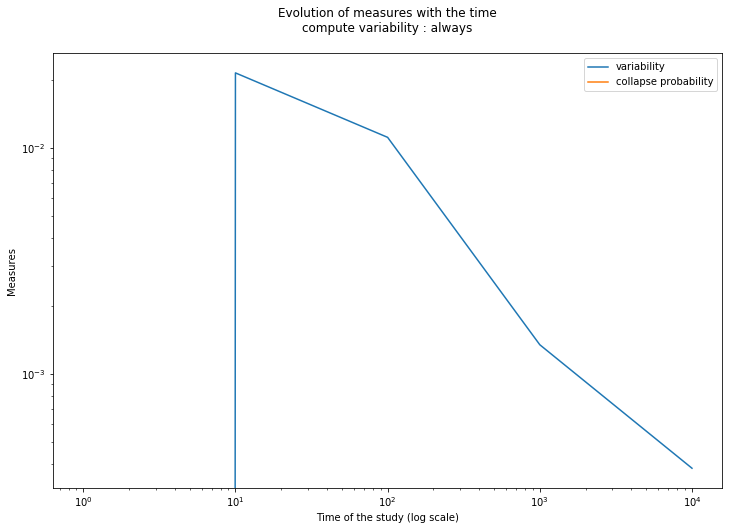

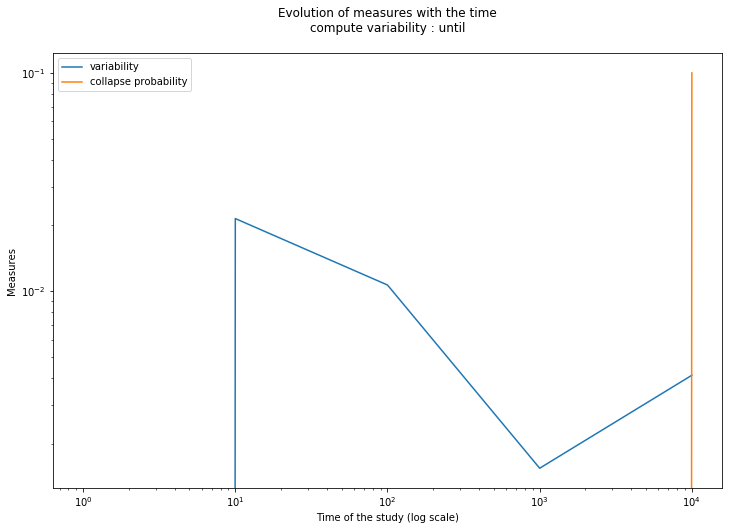

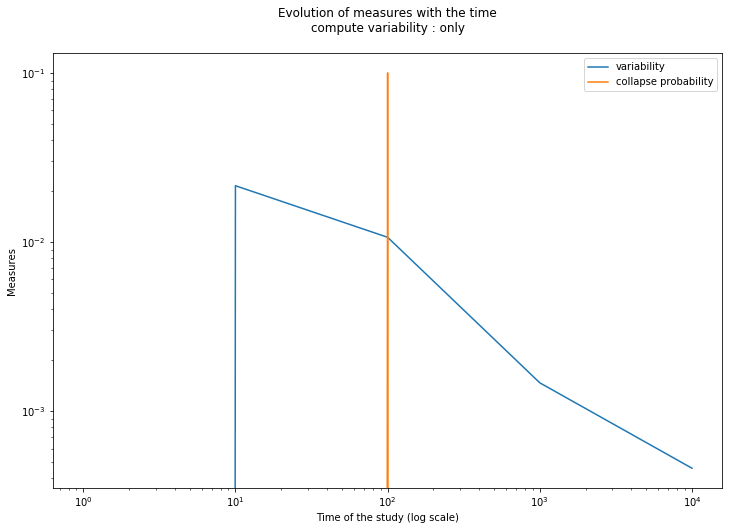

In [62]:
FinalTime = [10**i for i in range(0, 5)]

Param_freq = {"p":0.01}
Param_ampl = {"scale":0.07}

Fire = {"frequence": "bernoulli",
        "param_freq" : Param_freq,
        "amplitude": "exponential",
        "param_amplitude" : Param_ampl,
        "type" : "proportionnal",
        "coef_W_N" : 5}


for j, compute_variability in enumerate(Compute_variability):
    V = []
    C = []
    for i, finalTime in enumerate(FinalTime):
        v, c = measure(compute_variability = compute_variability, Fire = Fire, finalTime = finalTime) #############" modifier objet, au début et à perturbation"
        V += [v]
        C += [c]
    plt.figure(figsize=(12, 8))
    plt.loglog(FinalTime, V, label="variability")
    plt.loglog(FinalTime, C, label="collapse probability")
    plt.legend()
    plt.xlabel("Time of the study (log scale)")
    plt.ylabel("Measures")
    plt.title("Evolution of measures with the time\ncompute variability : "+compute_variability+"\n")
    plt.savefig("plot/measures/Measures_over_time_compute_variability_"+compute_variability)
    plt.show()

### Study of the impact of fire frequency

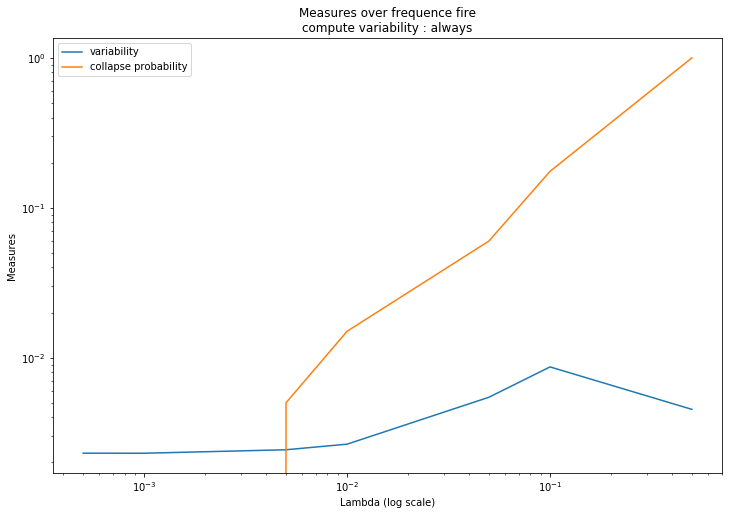

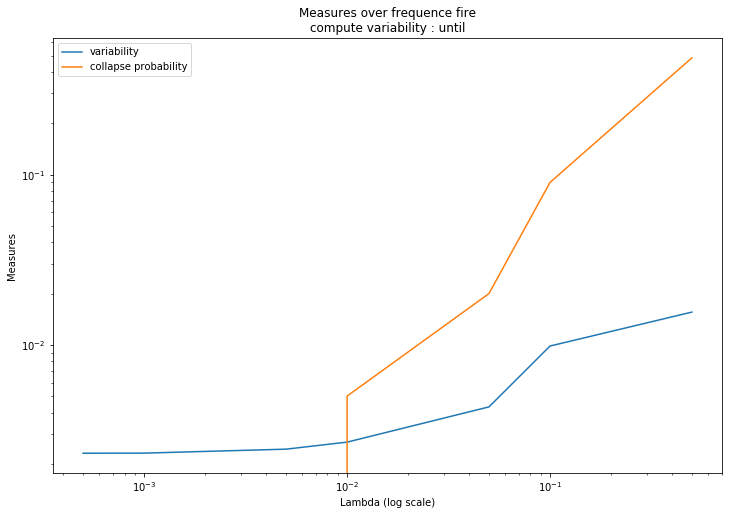

C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice


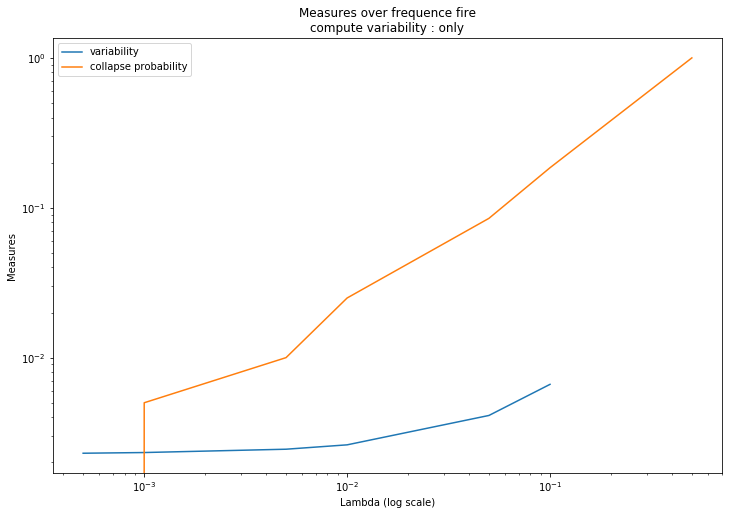

In [21]:
Freq = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

Param_freq = {"p":0.01}
Param_ampl = {"scale":0.07}

Fire = {"frequence": "bernoulli",
        "param_freq" : Param_freq,
        "amplitude": "exponential",
        "param_amplitude" : Param_ampl,
        "type" : "proportionnal",
        "coef_W_N" : 5}

for j, compute_variability in enumerate(Compute_variability):
    V = []
    C = []
    for i, freq in enumerate(Freq):
        Param_freq = {"p":freq}
        Fire["param_freq"] = Param_freq
        v, c = measure(compute_variability = compute_variability, Fire = Fire) #############" modifier objet, au début et à perturbation"
        V += [v]
        C += [c]
    plt.figure(figsize=(12, 8))
    plt.loglog(Freq, V, label="variability")
    plt.loglog(Freq, C, label="collapse probability")
    plt.legend()
    plt.xlabel("Lambda (log scale)")
    plt.ylabel("Measures")
    plt.title("Measures over frequence fire\ncompute variability : "+compute_variability)
    plt.savefig("plot/measures/Measures_over_frequence_fire_compute_variability_"+compute_variability)
    plt.show()

# cp over variability ================================

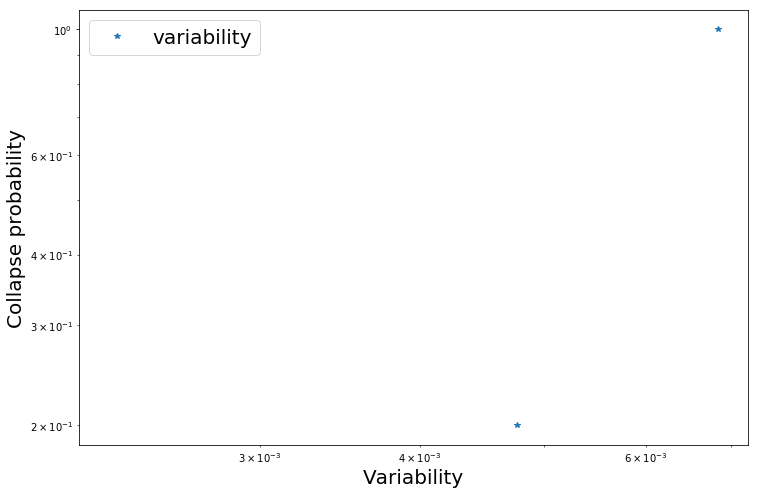

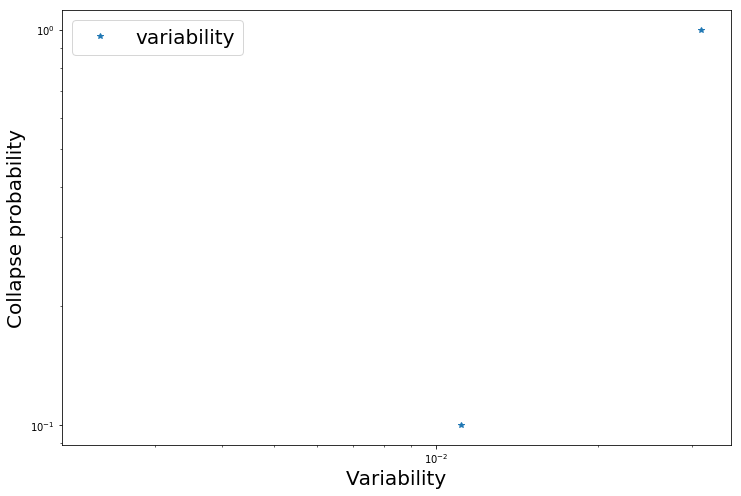

C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice


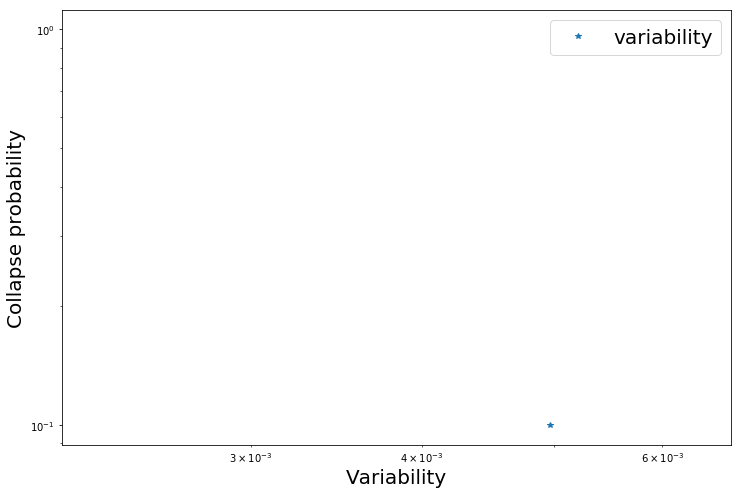

In [68]:
Freq = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

Param_freq = {"p":0.01}
Param_ampl = {"scale":0.07}

Fire = {"frequence": "bernoulli",
        "param_freq" : Param_freq,
        "amplitude": "exponential",
        "param_amplitude" : Param_ampl,
        "type" : "proportionnal",
        "coef_W_N" : 5}

for j, compute_variability in enumerate(Compute_variability):
    V = []
    C = []
    for i, freq in enumerate(Freq):
        Param_freq = {"p":freq}
        Fire["param_freq"] = Param_freq
        v, c = measure(compute_variability = compute_variability, Fire = Fire) #############" modifier objet, au début et à perturbation"
        V += [v]
        C += [c]
    plt.figure(figsize=(12, 8))
    plt.loglog(V, C, "*", label="variability")
    plt.legend(prop={'size':20})
    plt.xlabel("Variability", fontsize=20)
    plt.ylabel("Collapse probability", fontsize=20)
   #  plt.title("Measures over frequence fire\ncompute variability : "+compute_variability)
  #  plt.savefig("plot/measures/Measures_over_frequence_fire_compute_variability_"+compute_variability)
    plt.show()

### measures over amplitude (here number of simulation = 1000)

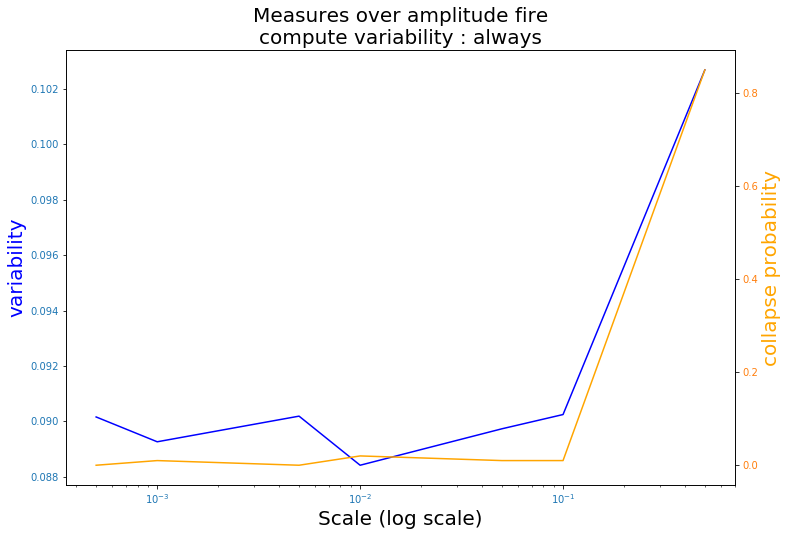

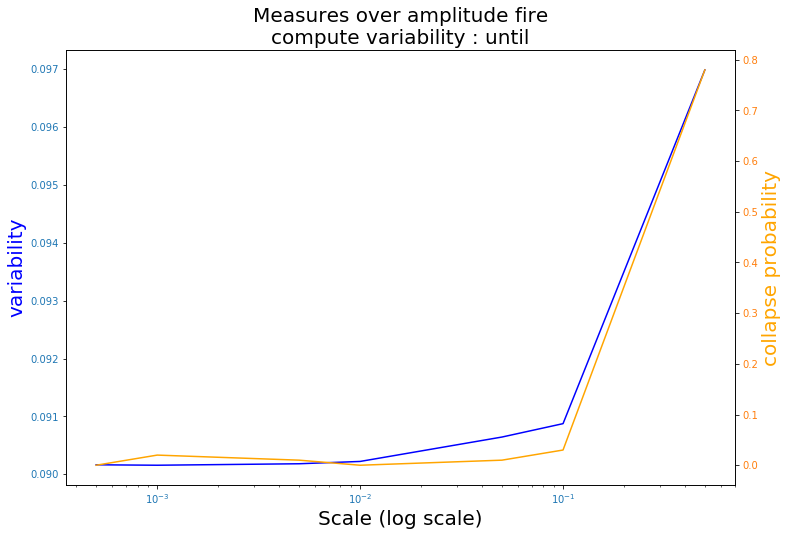

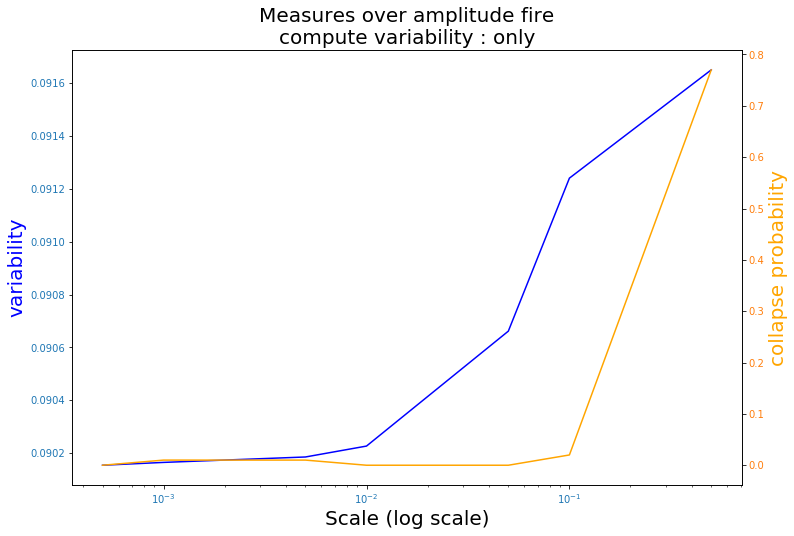

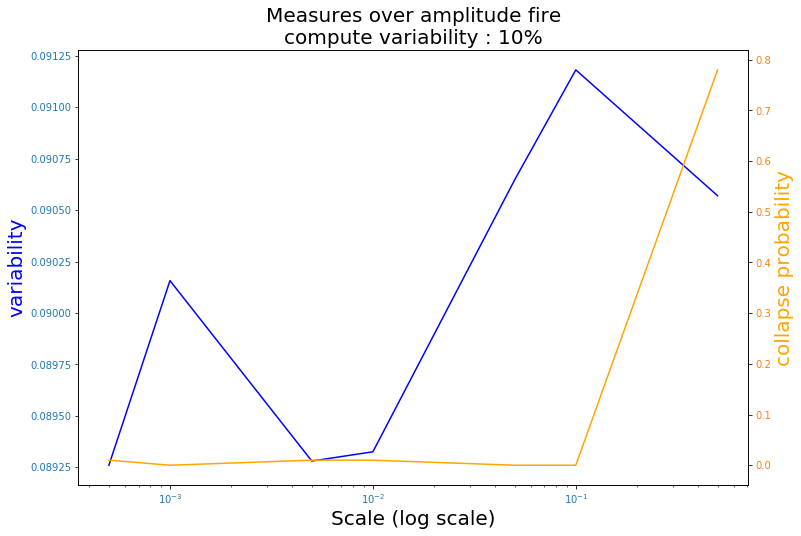

In [99]:
exec(open("objet.py").read(), globals())

Ampl = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

Param_freq = {"p":0.01}
Param_ampl = {"scale":0.07}

Fire = {"frequence": "bernoulli",
        "param_freq" : Param_freq,
        "amplitude": "exponential",
        "param_amplitude" : Param_ampl,
        "type" : "proportionnal",
        "coef_W_N" : 5}

for j, compute_variability in enumerate(Compute_variability):
    V = []
    C = []
    for i, ampl in enumerate(Ampl):
        Param_ampl = {"scale":ampl}
        Fire["param_amplitude"] = Param_ampl
        v, c = measure(Number_of_simulation = 100, compute_variability = compute_variability, Fire = Fire) ############# modifier objet, au début et à perturbation"
        V += [v]
        C += [c]
    plt.figure(figsize=(12, 8))
    plt.semilogx(Ampl, V, "b", label="variability")
    plt.ylabel("variability", color="blue", fontsize=20)
    plt.xlabel("Scale (log scale)", fontsize=20)
    plt.tick_params(labelcolor = 'tab:blue')

    plt.twinx()    
    plt.semilogx(Ampl, C, "orange", label="collapse probability")
    plt.tick_params(labelcolor = 'tab:orange')    
    plt.xlabel("Scale (log scale)", fontsize=20)
    plt.ylabel("collapse probability", color = "orange", fontsize=20)
    
    plt.title("Measures over amplitude fire\ncompute variability : "+compute_variability, fontsize=20)
    plt.savefig("plot/measures/Measures_over_amplitude_fire_compute_variability_"+compute_variability)
    plt.show()

## Impact of both freq and scale

C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice


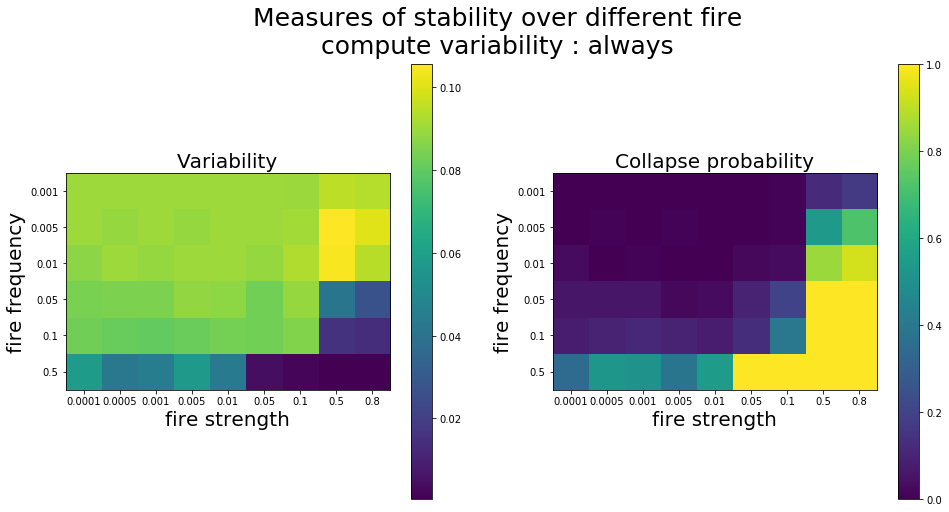

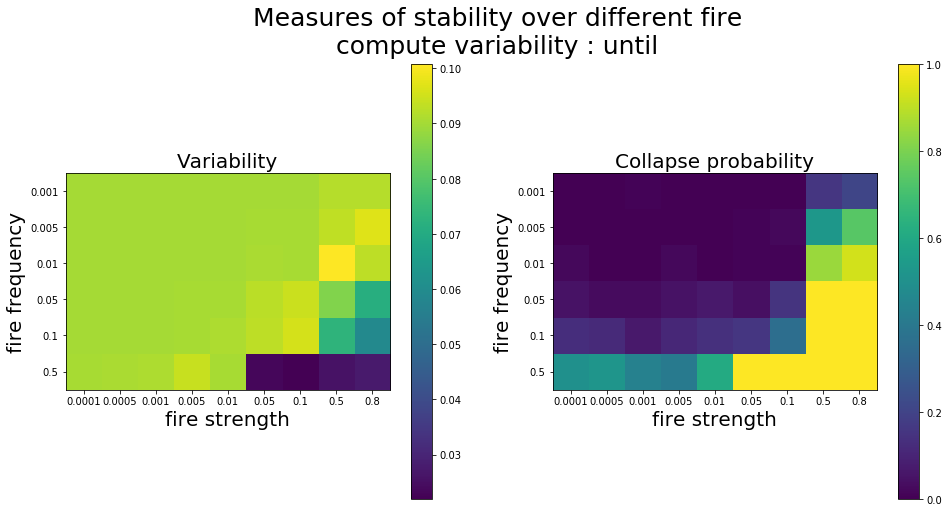

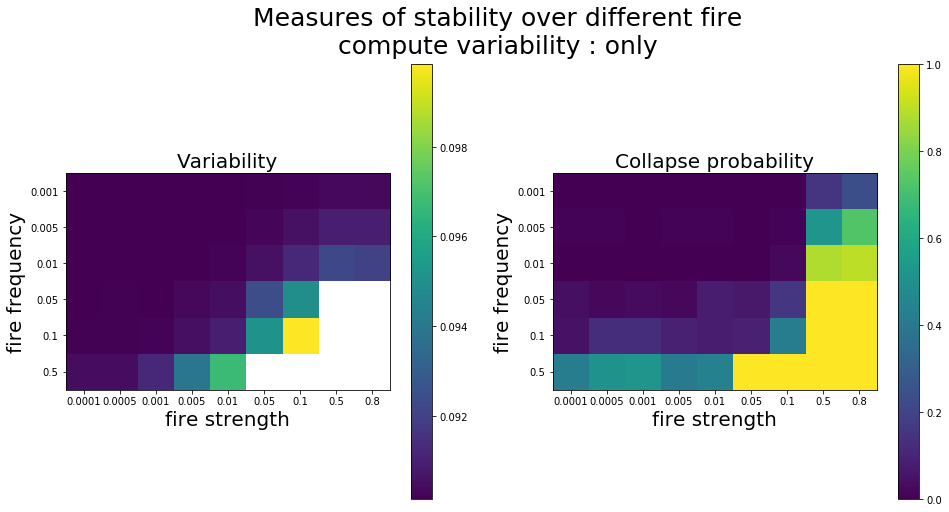

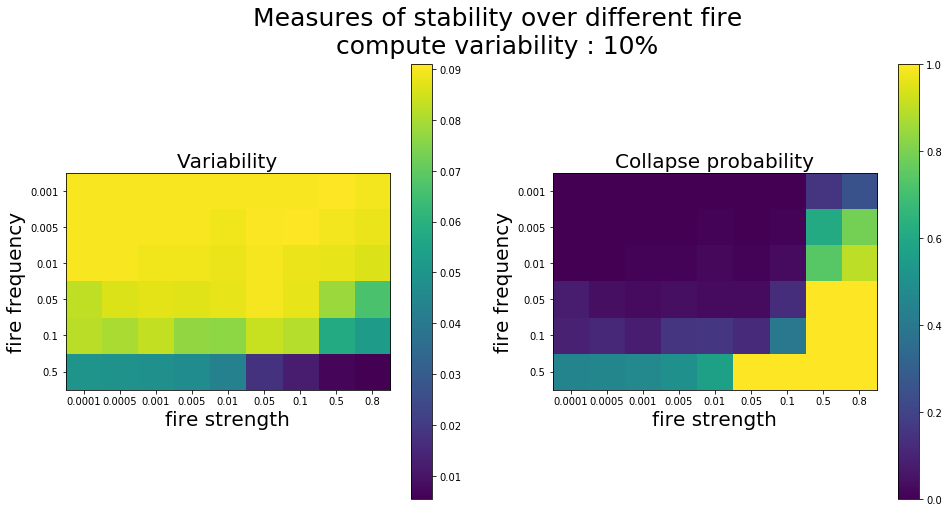

In [98]:
Freq = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
Ampl = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.8]

Param_freq = {"p":0.01}
Param_ampl = {"scale":0.07}

Fire = {"frequence": "bernoulli",
        "param_freq" : Param_freq,
        "amplitude": "exponential",
        "param_amplitude" : Param_ampl,
        "type" : "proportionnal",
        "coef_W_N" : 5}

for j, compute_variability in enumerate(Compute_variability):
    V = np.zeros((len(Freq), len(Ampl)))
    C = np.zeros_like(V)
    for i, freq in enumerate(Freq):
        Param_freq = {"p":freq}
        Fire["param_freq"] = Param_freq
        for j, ampl in enumerate(Ampl):
            Param_ampl = {"scale":ampl}
            Fire["param_amplitude"] = Param_ampl
            v, c = measure(Number_of_simulation = 100, compute_variability = compute_variability, Fire = Fire) #############" modifier objet, au début et à perturbation"
            V[i,j] = v
            C[i,j] = c
    plt.figure(figsize = (16, 8))
    plt.suptitle("Measures of stability over different fire\ncompute variability : "+compute_variability, fontsize=25)

    plt.subplot(1,2,1)
    plt.imshow(V)
    plt.xticks(np.arange(len(Ampl)), Ampl)
    plt.yticks(np.arange(len(Freq)), Freq)
    plt.colorbar()
    plt.title("Variability", fontsize=20)
    plt.ylabel("fire frequency", fontsize=20)
    plt.xlabel("fire strength", fontsize=20)

    plt.subplot(1,2,2)
    plt.imshow(C)
    plt.xticks(np.arange(len(Ampl)), Ampl)
    plt.yticks(np.arange(len(Freq)), Freq)
    plt.colorbar()
    plt.title("Collapse probability", fontsize=20)
    plt.ylabel("fire frequency", fontsize=20)
    plt.xlabel("fire strength", fontsize=20)
    
    plt.savefig("plot/measures/Measures_over_freq_amplitude_compute_variability_"+compute_variability)

    #plt.savefig("plot/Measures_freq_ampl_2")